# Stock Analysis, Comparison & Recommendation Tool

In [1]:
#pip install tagui

In this project, we will be using RPA to scrape useful data related to the stock market since its an easily retrievable dataset that we can pull out and make analysis with. At the same time, I hope it will prove to be a useful tool for beginner investors to do a quick comparison of the stock indicators before they proceed to look beyond just financials and understand the business of the company further. This tool is not intended to be the end all and be all but could be useful in helping one to make the first decisive step of narrowing down the stocks in the market that one is considering to invest in.

In [2]:
import tagui as t

In [3]:
class Stock(object):
    stockId = ""
    stockName = ""
    stockPrice = 0
    freeCashFlowPrev = ""
    freeCashFlowCurr = ""
    eps = 0
    dividendYield = ""
    peRatio = 0
    roe = ""
    netIncomePrev = ""
    netIncomeCurr = ""
    netOperatingIncomePrev = ""
    netOperatingIncomeCurr = ""
    
def make_stock(stockId, stockName, stockPrice, freeCashFlowPrev, freeCashFlowCurr, eps, dividendYield, peRatio, roe, netIncomePrev, netIncomeCurr, netOperatingIncomePrev, netOperatingIncomeCurr):
    stock = Stock()
    stock.stockId = stockId
    stock.stockName = stockName
    stock.stockPrice = stockPrice
    stock.freeCashFlowPrev = freeCashFlowPrev
    stock.freeCashFlowCurr = freeCashFlowCurr
    stock.eps = eps
    stock.dividendYield = dividendYield
    stock.peRatio = peRatio
    stock.roe = roe
    stock.netIncomePrev = netIncomePrev
    stock.netIncomeCurr = netIncomeCurr
    stock.netOperatingIncomePrev = netOperatingIncomePrev
    stock.netOperatingIncomeCurr = netOperatingIncomeCurr

    return stock

### List of Stocks under the SGX Market 
For now, I'll only allow the user to select SGX listed stocks. This will help reduce issues of any errors detected in the stock Ids which may eventually hamper our RPA analysis & stock recommendation. I managed to receive the list of SGX stocks from an online site called [Eoddata](http://eoddata.com/stocklist/SGX/1.htm). We'll compare the id entered by the user with the list generated from the site here to verify if the stock is valid before we proceed to scrape the data.



In [4]:
#Code below is the list of stocks available in SGX
sgxStocks = ["1A0","1A1","1A4","1B0","1B1","1B5W","1B6","1C0","1C3","1C4W","1C5","1C9W","1D0","1D1","1D3","1D4","1D5","1D8","1E0W","1E3","1E6","1E7W","1F0","1F1","1F2","1F3","1F4","1F9W","1G1","1G5W","1G6","1G7W","1H2","1H3","1H4","1H7W","1H8","1I3W","1I5","1J0","1J1W","1J3","1J4","1J5","1J6W","1J7","1V2W","1YUW","3UJS","40B","40D","40E","40F","40N","40R","40S","40T","40U","40V","40W","41A","41B","41F","41H","41O","41S","41T","42C","42D","42E","42F","42G","42L","42N","42QW","42R","42S","42T","42U","42W","42Z","43A","43B","43E","43F","43MW","43P","43Q","47RW","500","502","504","505","508","510","528","532","533","539","540","541","543","544","546","554","557","558","561","564","566","567","569","56OW","570","571","573","575","578","579","580","581","583","584","585","586","588","594","595","596","5A1B","5AB","5AE","5AI","5AL","5AM","5AU","5BI","5BS","5CF","5CJ","5CN","5CP","5CQ","5CR","5CT","5DD","5DL","5DM","5DN","5DO","5DP","5DS","5DW","5DX","5EB","5EC","5EF","5EG","5EK","5EL","5EN","5EV","5EW","5F4","5F7","5FH","5FL","5FW","5FX","5G1","5G2","5G3","5G4","5G9","5GC","5GD","5GF","5GI","5GJ","5GZ","5H0","5HC","5HG","5HH","5HT","5HV","5I0","5I1","5I4","5IC","5IE","5IF","5IG","5JK","5JS","5KI","5KT","5LE","5LY","5MD","5ME","5ML","5MM","5MQ","5MS","5MZ","5NF","5NG","5NK","5NV","5OC","5OI","5OQ","5OR","5OT","5OU","5OX","5PC","5PD","5PF","5PI","5PL","5PO","5QR","5QT","5QY","5RA","5RC","5RE","5RF","5SO","5SR","5SY","5TI","5TJ","5TN","5TP","5TR","5TS","5TT","5TW","5TY","5UA","5UF","5UJ","5UL","5UN","5UO","5UX","5VC","5VI","5VJ","5VP","5VS","5WA","5WE","5WF","5WG","5WH","5WJ","5WV","5YTW","600","6HZW","6SUS","7PMS","7QQS","8I9W","8YY","8ZCW","8ZMR","9H7W","9HSW","9IRW","9K9W","9Y4W","A04","A05","A13","A17U","A26","A27","A30","A31","A33","A34","A35","A50","A52","A55","A68U","A75","A78","A7RU","A7S","AAJ","ACV","AD8","ADJ","ADN","ADP","ADQU","AFC","AFUS","AFVS","AGS","AIY","AJ2","AJBU","AJHW","AOF","AP4","AU8U","AUE","AVM","AVV","AVX","AW9U","AWC","AWE","AWG","AWI","AWK","AWM","AWO","AWS","AWV","AWX","AWZ","AXB","AXXZ","AYB","AYD","AYL","AYN","AYV","AZA","AZG","AZR","AZT","AZW","AZY","AZZ","B07","B0Z","B16","B26","B28","B49","B58","B61","B66","B69","B73","B7K","B83W","B9S","BAC","BAI","BAZ","BBP","BBW","BCD","BCV","BCY","BCZ","BDA","BDF","BDN","BDR","BDU","BDX","BEC","BEH","BEI","BEV","BEW","BEYZ","BEZ","BFI","BFK","BFT","BFU","BGK","BGO","BHD","BHK","BHO","BHQ","BHU","BIP","BIX","BJD","BJGS","BJHS","BJIS","BJJS","BJL","BJV","BJW","BJZ","BKA","BKK","BKV","BKW","BKX","BKY","BKZ","BLA","BLH","BLL","BLR","BLS","BLU","BLW","BLZ","BMGU","BMNW","BMT","BN2","BN4","BNE","BOU","BPF","BQC","BQD","BQF","BQI","BQM","BQN","BQP","BR9","BRD","BRE","BRQZ","BRR","BRS","BS6","BSHW","BSKZ","BSL","BTE","BTF","BTG","BTJ","BTM","BTNZ","BTOU","BTP","BTWZ","BTX","BTY","BUOU","BUPW","BVA","BVP","BVQ","BWCU","BWM","BWQU","BXE","BYI","BYJ","BZKS","C04","C05","C06","C07","C09","C13","c29","C2PU","C31","C33","C38U","C41","C50","C52","C61U","C6L","C70","C71","C76","C8R","C92","C9Q","CC3","CDVZ","CDWW","CDXW","CEDU","CEE","CEGW","CFA","CFN","CGN","CGOW","CGP","CH8","CHBW","CHJ","CHZ","CIN","CIOW","CIPW","CIQW","CIRW","CISW","CITW","CIUW","CIVW","CIWW","CIXW","CJLU","CJN","CLN","CLR","CMGS","CMHS","CMOU","CNE","CNNU","COI","CPRW","CPSW","CPTW","CPUW","CPVW","CPWW","CQEW","CQLW","CRJW","CRPU","CRWW","CSFU","CTMW","CTN","CTO","CTPW","CXFW","CY6U","CYW","CZ4","D01","D03","D05","D07","D11","D2U","D50","D5IU","D6U","D79","D8DU","DAAW","DABW","DAEW","DALW","DANW","DASW","DAUW","DAWW","DAZW","DBCW","DBZW","DCLW","DCPW","DCSW","DDBW","DDIW","DDJW","DDMW","DDQW","DDWW","DEKW","DEZW","DFFW","DFHW","DFJW","DGAW","DGOW","DGRW","DGSW","DHDW","DHYW","DIRW","DJWW","DKFW","DKUW","DLAW","DLQW","DM0","DMPW","DMQW","DMUW","DNBW","DNEW","DNXW","DNZW","DOXW","DPEW","DPIW","DPWW","DQDW","DQTW","DRWW","DRX","DSAW","DSBW","DSCW","DSIW","DSLW","DSNW","DSSW","DSVW","DSYW","DTAW","DTFW","DTNW","DU4","DUFW","DUZW","DVOW","DVVW","DWAW","DWBW","DXAW","DXMW","DXUW","DYAW","DYDW","DZAW","DZLW","E16","E27","E28","E3B","E5H","E6R","E8Z","E90","E9L","EB5","EB7","ECDW","EG0","EH5","EOYW","ER0","ES3","EUQW","F03","F10","F13","F17","F1E","F31","F34","F3V","F83","F86","F99","F9D","FGNW","FIAW","FQ7","FQ8","G07","G0I","G11","G13","G1N","G20","G3B","G41","G50","G54","G92","GDEW","GNAW","GNLW","GOKW","GU5","GXYW","GYKW","H02","H07","H12","H13","H15","H16","H17","H18","H19","H1N","H20","H22","H30","H78","HAGW","HBXW","HD6","HD7","HD8","HD9","HE0","HNTW","HUBW","HYZR","i06","i07","i11","i15","i26","i49","I5H","I98","I9T","IBCW","IBSW","IH0","IH1","IH2","IH3","INXW","INYW","IPKW","IW5","IWKW","IX2","IYVW","J03","J0O","J0P","J0Q","J0R","J17","J18","J2T","J36","J37","J69U","J85","J91U","JK8","JLB","JPBW","JPCW","JRCB","JYEU","JYIW","K03","K1Q","K22","K29","K2LU","K3CD","K3DD","K3ED","K3FD","K3HD","K3ID","K3JD","K3MD","K3OD","K3PD","K3RD","K3SD","K3TD","K6K","K6S","K71U","K75","KDVW","KF8","KHDW","KI3","KJ5","KJ7","KMDW","KT3","KT4","KUH","KUO","KUX","KV4","KVWW","KXWW","L02","L03","L09","L19","L23","L38","L46","L5I","LCKW","LF1","LF2","LG6","LG7","LG8","LG9","LGMW","LIW","LJ3","LKAW","LS9","LSHS","LSOW","LUY","LYVW","M01","M03","M04","M05","M11","M14","M15","M1GU","M1Z","M30","M44U","M62","MADW","MBH","ME8U","MECW","MF6","MIJ","MMQW","MMVW","MR7","MR8","MT1","MU7","MV4","MWOW","N01","N02","N08","N0Z","N14","N2E","N2H","N2IU","N32","N33","N4E","N5YD","N6DD","N6FD","N6M","NC2","ND8U","NEX","NHD","NIPW","NJBW","NKNW","NO4","NPW","NR7","NS8U","NYHW","NYXW","O08","O10","O2I","O32","O39","O5RU","O6Z","O87","O9A","O9C","O9D","O9E","O9P","OAJ","OL9S","OM0S","OMK","OQOW","OTX","OU8","OV8","OVQ","OXMU","OYY","P11","P15","P34","P36","P40U","P52","P58","P5P","P60","P74","P7VU","P8A","P8Z","P9D","PA3","PDRW","PDSW","PFYW","PH0","PH1S","PPNR","PQPW","PU6D","PUPW","Q01","Q0F","Q0X","Q1P","Q5T","QC7","QES","QF6","QK9","QL2","QL3","QNHW","QOBW","QOMW","QR9","QS0","QS9","QSCW","QSXW","QZG","R14","R1MS","R1NS","R89W","RC5","RCU","RDR","RE4","RF1U","RF7","RGOW","RHMW","RIAW","RKWW","RMRB","ROKW","RQ1","RS1","RTRW","RW0U","S07","S08","S19","S20","S23","S27","S29","S2D","S35","S3N","S41","S44","S45U","S46","S49","S51","S56","S58","S59","S61","S63","S68","S69","S71","S7OU","S7P","S85","S91","S9B","SCFW","SCOW","SHGW","SJY","SK3","SK6U","SO7","SQ1B","SQSR","SSDW","STEW","STP","SV3U","T09","T12","T13","T14","T15","T19","T24","T39","T41","T43","T4B","T55","T6I","T82U","T8FS","T8V","TAHW","TEKB","TID","TIKW","TKYW","TOKW","TOQW","TQ5","TS0U","TSSW","TXSW","TY6Z","U04","U05","U06","U09","U10","U11","U13","U14","U6C","U77","U96","U9E","UBWW","UD1U","UD2","UEAW","UNAW","UPQW","UQ4","UQFW","UQXW","URR","UV1","UXCW","V01","V03","V2Y","V3M","VAIW","VFP","VK7W","VL6","VM8W","VRHW","VX2W","W05","W4AW","W4JW","W4QW","W8BW","WB1W","WG2W","WJOW","WOYW","WPC","WQCW","WVZW","X06","X2WW","X5VW","XCF","XIEW","XKLW","XLVW","XZL","Y03","Y06","Y0JW","Y35","Y45","Y92","YDHR","YFEW","YHUW","YJFW","YM7W","YPFW","YQ1W","YT9W","YYB","Z25","Z59","Z74","Z77","ZXJW"
]

In [5]:
## Function to check validity of stock
def checkValid(str):
    # Code to determine if player wins
    for i in sgxStocks:
        if i == str:
            return True

    return False

In [6]:
stock_array = list()
stocks = list()

number = "0"
while int(number) < 3: 
    number = input("Enter the number of stocks (Minimum of 4 or more) you want to analyze:")
print ('Enter each Stock ID, Eg.CJLU: ')
for i in range(int(number)):
    n = input("Stock ID "+str(i+1)+": ")
    n = n.upper() #CAPS all the letters
    #We should carry out conditional checks here to verify that the Stock Listing is Valid before 
    #proceeding & minimum stocks compared are 3 and above
    #################################################################################################################################################
    check = checkValid(n)
    while check==False:
        print("Stock ID " +str(i+1)+ " is invalid. Please re-enter stock ID")
        n = input("Stock ID "+str(i+1)+": ")
        n = n.upper() #CAPS all the letters
        check = checkValid(n)
    stock_array.append(n)
print ('Stock ID:' ,stock_array)


Enter the number of stocks (Minimum of 4 or more) you want to analyze:5
Enter each Stock ID, Eg.CJLU: 
Stock ID 1: cjlu
Stock ID 2: ajbu
Stock ID 3: chz
Stock ID 4: cne
Stock ID 5: 1a0
Stock ID: ['CJLU', 'AJBU', 'CHZ', 'CNE', '1A0']


In [7]:
########FOR PRACTICE/TESTING##########
#stock_array = ['CJLU.SI','CNE.SI','AP4.SI','CHZ.SI','BSL.SI','V03.SI','M1GU.SI','AJBU.SI','ME8U.SI']

In [8]:
#Open Yahoo stock site to scrape relevant data of stocks we want to look at.
url = 'https://sg.finance.yahoo.com/quote/'
t.init(visual_automation = True, chrome_browser = True)


#We then iterate through the stocks code that have been selected
for i in stock_array:
    newUrl = url + i +'.SI'+'/'
    t.url(newUrl)
    #Carry out scraping of data here
    t.wait(2)
    
    #Storing current price of the stock
    stockId = i
    stockPrice = float(t.read('//*[@id="quote-header-info"]/div[3]/div/div/span[1]'))
    stockName = t.read('//*[@id="quote-header-info"]/div[2]/div[1]/div[1]/h1')    
    
    #Storing key indicators of stock
    dividendYield = ((t.read('//*[@id="quote-summary"]/div[2]/table/tbody/tr[6]/td[2]')))
    dividendYield = dividendYield.replace("%","")
    
    peRatio = ((t.read('//*[@id="quote-summary"]/div[2]/table/tbody/tr[3]/td[2]/span')))
    if peRatio == "N/A":
        peRatio = "0"
    eps = float((t.read('//*[@id="quote-summary"]/div[2]/table/tbody/tr[4]/td[2]/span')))
    
    #Go to the financials tab to scrape data
    t.click('//*[@id="quote-nav"]/ul/li[7]/a/span') 
    t.wait(2)
    
    netIncomePrev = ((t.read('//*[@id="Col1-1-Financials-Proxy"]/section/div[3]/div[1]/div/div[2]/div[11]/div[1]/div[4]/span')))
    netIncomePrev = netIncomePrev.replace(',', '')
    if not netIncomePrev:
        netIncomePrev = '0'
    
    netIncomeCurr = ((t.read('//*[@id="Col1-1-Financials-Proxy"]/section/div[3]/div[1]/div/div[2]/div[11]/div[1]/div[3]/span')))    
    netIncomeCurr = netIncomeCurr.replace(',', '')
    if not netIncomeCurr:
        netIncomeCurr = '0'
    
    netOperatingIncomePrev = ((t.read('//*[@id="Col1-1-Financials-Proxy"]/section/div[3]/div[1]/div/div[2]/div[5]/div[1]/div[4]/span')))
    netOperatingIncomePrev = netOperatingIncomePrev.replace(',', '')
    if not netOperatingIncomePrev:
        netOperatingIncomePrev = '0'

    netOperatingIncomeCurr = ((t.read('//*[@id="Col1-1-Financials-Proxy"]/section/div[3]/div[1]/div/div[2]/div[5]/div[1]/div[3]/span')))
    netOperatingIncomeCurr = netOperatingIncomeCurr.replace(',', '')
    if not netOperatingIncomeCurr:
        netOperatingIncomeCurr = '0'

    #Go to the Cash Flow tab to scrape data
    t.click('//*[@id="Col1-1-Financials-Proxy"]/section/div[1]/div[1]/div/a[2]/div/span') 
    t.wait(2)
    
    freeCashFlowPrev = ((t.read('//*[@id="Col1-1-Financials-Proxy"]/section/div[3]/div[1]/div/div[2]/div[7]/div[2]/div[3]/div[1]/div[4]/span')))
    freeCashFlowPrev = freeCashFlowPrev.replace(',', '')
    if not freeCashFlowPrev:
        freeCashFlowPrev = '0'      
    
    freeCashFlowCurr = ((t.read('//*[@id="Col1-1-Financials-Proxy"]/section/div[3]/div[1]/div/div[2]/div[7]/div[2]/div[3]/div[1]/div[3]/span')))
    freeCashFlowCurr = freeCashFlowCurr.replace(',', '')
    if not freeCashFlowCurr:
        freeCashFlowCurr = '0'  
        
    #Go to Statistics tab to scrape data
    t.click('//*[@id="quote-nav"]/ul/li[4]/a') 
    t.wait(2)
    
    roe = ((t.read('//*[@id="Col1-0-KeyStatistics-Proxy"]/section/div[2]/div[3]/div/div[3]/div/table/tbody/tr[2]/td[2]')))
    roe = roe.replace("%","")
    
    stock = make_stock(stockId, stockName, stockPrice, freeCashFlowPrev, freeCashFlowCurr, eps, dividendYield, peRatio, roe, netIncomePrev, netIncomeCurr, netOperatingIncomePrev, netOperatingIncomeCurr)
    stocks.append(stock)
    
t.close()
print("All relevant data have been scraped.")

All relevant data have been scraped.


###### Let's take a look at a sample stock that we managed to scrape online and the various indicators that came along with it.

In [9]:
for i in stocks[0:1]:
    print('Stock ID: ',i.stockId)
    print('Stock Name: ',i.stockName)
    print('Stock Price: ',i.stockPrice)
    print('Previous Year Net Income: ',i.netIncomePrev)
    print('Latest Net Income: ',i.netIncomeCurr)
    print('Previous Operating Income: ',i.netOperatingIncomePrev)
    print('Latest Operating Net Income: ',i.netOperatingIncomeCurr)
    print('Previous Free Cash Flow: ',i.freeCashFlowPrev)
    print('Latest Cash Flow: ',i.freeCashFlowCurr)
    print('Earnings Per Share: ',i.eps)
    print('Dividend Yield: ',i.dividendYield)
    print('PE Ratio: ',i.peRatio)
    print('ROE: ',i.roe)
    print(' ')
    
    #Use XPath!!!!

Stock ID:  CJLU
Stock Name:  NetLink NBN Trust (CJLU.SI)
Stock Price:  0.95
Previous Year Net Income:  49950
Latest Net Income:  77359
Previous Operating Income:  54468
Latest Operating Net Income:  85418
Previous Free Cash Flow:  -53730
Latest Cash Flow:  158542
Earnings Per Share:  0.021
Dividend Yield:  0.05 (5.25)
PE Ratio:  45.24
ROE:  N/A
 


### Analysis & Visualisation of Scraped Data of Selected Stocks

In [10]:
#Change in Net Income
#Change in Operating Income
stockNames = list()
changeOpIncome = list()
changeNetIncome = list()

for i in stocks:
    stockNames.append(i.stockName)
    changeInOperatingIncome = float(i.netOperatingIncomeCurr) - float(i.netOperatingIncomePrev)
    changeOpIncome.append(changeInOperatingIncome)    
    changeInNetIncome = float(i.netIncomeCurr) - float(i.netIncomePrev)
    changeNetIncome.append(changeInNetIncome)

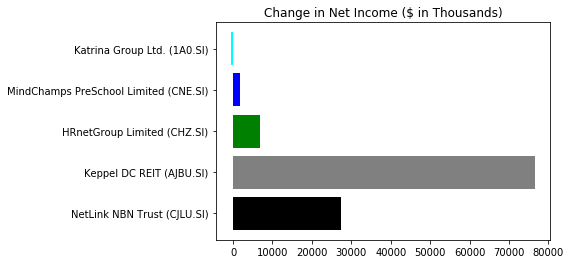

In [11]:
import matplotlib.pyplot as pltNetIncome
%matplotlib inline
pltNetIncome.title('Change in Net Income ($ in Thousands)')
pltNetIncome.barh(stockNames, changeNetIncome, color=['black', 'grey', 'green', 'blue', 'cyan'])
pltNetIncome.show()

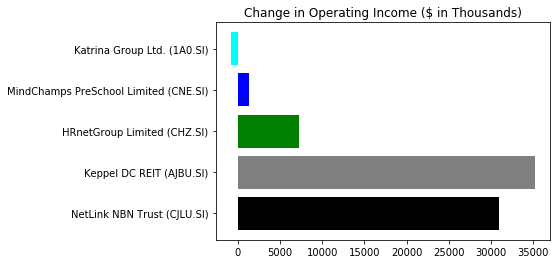

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.title('Change in Operating Income ($ in Thousands)')
plt.barh(stockNames, changeOpIncome, color=['black', 'grey', 'green', 'blue', 'cyan'])
plt.show()

In [13]:
cashFlowPrev = list()
cashFlowCurr = list()
changeCashFlow = list()

for i in stocks:
    cashFlowC = float(i.freeCashFlowCurr)
    cashFlowP = float(i.freeCashFlowPrev)
    if(cashFlowC==0 or cashFlowP==0):
        change = 0
    else:
        change = (cashFlowC - cashFlowP)/abs(cashFlowP)
    
    changeCashFlow.append(change)
    cashFlowPrev.append(cashFlowP)
    cashFlowCurr.append(cashFlowC)

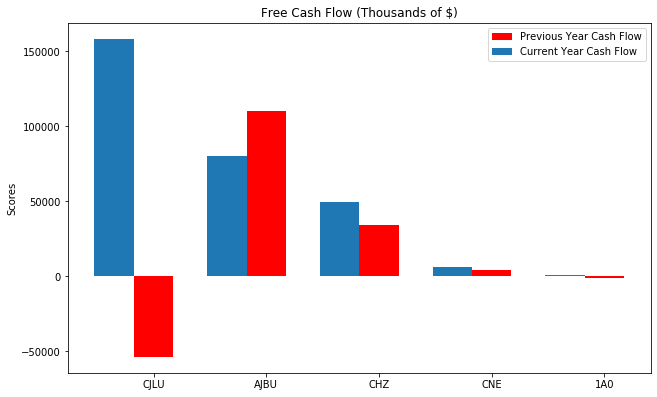

In [14]:
#Current Cash Flow
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

barWidth = 0.35  # the width of the bars

# Set position of bar on X axis
r1 = np.arange(len(stock_array))
r2 = [x + barWidth for x in r1]

fig, ax = plt.subplots()
rects2 = ax.bar(r2, cashFlowPrev, width=barWidth, color='red', label='Previous Year Cash Flow')
rects1 = ax.bar(r1, cashFlowCurr, width=barWidth, label='Current Year Cash Flow' )

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Free Cash Flow (Thousands of $)')
ax.legend()
plt.xticks([r + barWidth for r in range(len(stock_array))], stock_array)

fig.tight_layout()
fig.set_figheight(6)
fig.set_figwidth(10)
#Show graphic
plt.show()

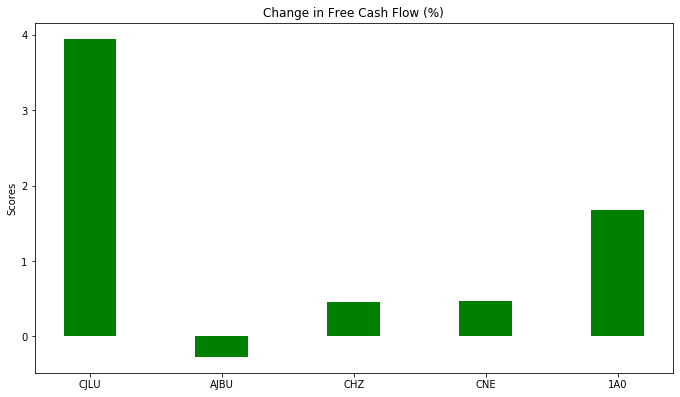

In [15]:
#Change in Free Cash Flow
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

barWidth = 0.4  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(stock_array, changeCashFlow, width=barWidth, label='Current Year Cash Flow' , color='green')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Change in Free Cash Flow (%)')
fig.tight_layout()

fig.set_figheight(6)
fig.set_figwidth(10)

plt.show()

### Summary of Top 3 Stocks Based on Each Indicator

In [16]:
import re
#Current Earnings Per Share
epsList = list()
#PE Ratio
peList = list()
#ROE
roeList = list()
#Dividend Yield
divList = list()

for i in stocks:
    epsList.append(i.eps)
    peList.append(float(i.peRatio))
    roeList.append(i.roe)
    
    s = i.dividendYield
    #extract the percentage yield only
    divList.append(s[s.find("(")+1:s.find(")")])
    

#### Top 3 Earnings Per Share

In [17]:
#Lets keep score based on the various indicators that we have here to see which stocks we should consider the most.
score = [None] * len(stockNames)
for i in range(len(stockNames)):
    score[i] = 0

In [18]:
stockNamesCopy = stockNames.copy()
epsListCopy = epsList.copy()
count = 3 #basic scoring for the top 3
for i in range(3):
    top1 = max(epsListCopy)
    top1Index = epsListCopy.index(top1)
    
    #Get index for the score list & update score
    mainIndex = stockNames.index(stockNamesCopy[top1Index])
    score[mainIndex] = score[mainIndex]+count
    
    #print the top 3 stock & remove the stock from the iterating list to get next max
    print(stockNamesCopy[top1Index] + ':', top1)
    epsListCopy.remove(top1)
    stockNamesCopy.remove(stockNamesCopy[top1Index])

    count=count-1


Keppel DC REIT (AJBU.SI): 0.112
HRnetGroup Limited (CHZ.SI): 0.049
NetLink NBN Trust (CJLU.SI): 0.021


#### Top 3 Price Earnings (PE) Ratio

In [19]:
stockNamesCopy = stockNames.copy()
peListCopy = peList.copy()
count = 3 #basic scoring for top 3
for i in range(3):
    top1 = max(peListCopy)
    top1Index = peListCopy.index(top1)
    
    #Get index for the score list & update score
    mainIndex = stockNames.index(stockNamesCopy[top1Index])
    score[mainIndex] = score[mainIndex]+count

    #print the top 3 stock & remove the stock from the iterating list to get next max
    print(stockNamesCopy[top1Index] + ':', top1)
    peListCopy.remove(top1)
    stockNamesCopy.remove(stockNamesCopy[top1Index])
    
    count = count - 1


NetLink NBN Trust (CJLU.SI): 45.24
MindChamps PreSchool Limited (CNE.SI): 23.68
Keppel DC REIT (AJBU.SI): 20.36


#### Top 3 Return on Equity (ROE)

In [20]:
stockNamesCopy = stockNames.copy()
roeListCopy = roeList.copy()
roeListCopyFloat = list()
count = 5 #basic scoring for top 3
#Need to get rid of all those that are N/A
for i in roeListCopy:
    if 'N/A' == i:
        removeIndex = roeListCopy.index(i)
        roeListCopy.remove(i)
        stockNamesCopy.remove(stockNamesCopy[removeIndex])
    else:
        roeListCopyFloat.append(float(i))

for i in range(3):
    top1 = max(roeListCopyFloat)
    top1Index = roeListCopyFloat.index(top1)
    
    #Get index for the score list & update score
    mainIndex = stockNames.index(stockNamesCopy[top1Index])
    score[mainIndex] = score[mainIndex]+count
    
    #print the top 3 stock & remove the stock from the iterating list to get next max
    print(stockNamesCopy[top1Index] + ':', top1, '%')
    roeListCopyFloat.remove(top1)
    stockNamesCopy.remove(stockNamesCopy[top1Index])
 
    count = count - 1

Keppel DC REIT (AJBU.SI): 15.26 %
HRnetGroup Limited (CHZ.SI): 8.36 %
MindChamps PreSchool Limited (CNE.SI): -13.18 %


#### Top 3 Dividend Yield

In [21]:
#Dividend Yield
stockNamesCopy = stockNames.copy()
divListCopy = divList.copy()
count = 4 #basic scoring for top 3
#Need to get rid of all those that are N/A
for i in divListCopy:
    if 'N/A' == i:
        removeIndex = divListCopy.index(i)
        divListCopy.remove(i)
        stockNamesCopy.remove(stockNamesCopy[removeIndex])
        
for i in range(3):
    top1 = max(divListCopy)
    top1Index = divListCopy.index(top1)
    
    #Get index for the score list & update score
    mainIndex = stockNames.index(stockNamesCopy[top1Index])
    score[mainIndex] = score[mainIndex]+count
    
    #print the top 3 stock & remove the stock from the iterating list to get next max
    print(stockNamesCopy[top1Index] + ':', top1, '%')
    divListCopy.remove(top1)
    stockNamesCopy.remove(stockNamesCopy[top1Index])
    
    count = count - 1

NetLink NBN Trust (CJLU.SI): 5.25 %
HRnetGroup Limited (CHZ.SI): 4.59 %
Keppel DC REIT (AJBU.SI): 4.18 %


#### Top 3 Change in Operating Income

In [22]:
stockNamesCopy = stockNames.copy()
changeOpIncomeCopy = changeOpIncome.copy()
count = 3 #basic scoring for the top 3
for i in range(3):
    top1 = max(changeOpIncomeCopy)
    top1Index = changeOpIncomeCopy.index(top1)
    
    #Get index for the score list & update score
    mainIndex = stockNames.index(stockNamesCopy[top1Index])
    score[mainIndex] = score[mainIndex]+count
    
    #print the top 3 stock & remove the stock from the iterating list to get next max
    print(stockNamesCopy[top1Index] + ':', '$',top1)
    changeOpIncomeCopy.remove(top1)
    stockNamesCopy.remove(stockNamesCopy[top1Index])

    count=count-1


Keppel DC REIT (AJBU.SI): $ 35216.0
NetLink NBN Trust (CJLU.SI): $ 30950.0
HRnetGroup Limited (CHZ.SI): $ 7226.0


#### Top 3 Change in Net Income

In [23]:
stockNamesCopy = stockNames.copy()
changeNetIncomeCopy = changeNetIncome.copy()
count = 3 #basic scoring for the top 3
for i in range(3):
    top1 = max(changeNetIncomeCopy)
    top1Index = changeNetIncomeCopy.index(top1)
    
    #Get index for the score list & update score
    mainIndex = stockNames.index(stockNamesCopy[top1Index])
    score[mainIndex] = score[mainIndex]+count
    
    #print the top 3 stock & remove the stock from the iterating list to get next max
    print(stockNamesCopy[top1Index] + ':', '$',top1)
    changeNetIncomeCopy.remove(top1)
    stockNamesCopy.remove(stockNamesCopy[top1Index])

    count=count-1

Keppel DC REIT (AJBU.SI): $ 76656.0
NetLink NBN Trust (CJLU.SI): $ 27409.0
HRnetGroup Limited (CHZ.SI): $ 6846.0


#### Top 3 Change in Cash Flow

In [24]:
stockNamesCopy = stockNames.copy()
changeCashFlowCopy = changeCashFlow.copy()
count = 3 #basic scoring for the top 3
for i in range(3):
    top1 = max(changeCashFlowCopy)
    top1Index = changeCashFlowCopy.index(top1)
    
    #Get index for the score list & update score
    mainIndex = stockNames.index(stockNamesCopy[top1Index])
    score[mainIndex] = score[mainIndex]+count
    
    #print the top 3 stock & remove the stock from the iterating list to get next max
    print(stockNamesCopy[top1Index] + ':',round(top1,1), '%')
    changeCashFlowCopy.remove(top1)
    stockNamesCopy.remove(stockNamesCopy[top1Index])

    count=count-1

NetLink NBN Trust (CJLU.SI): 4.0 %
Katrina Group Ltd. (1A0.SI): 1.7 %
MindChamps PreSchool Limited (CNE.SI): 0.5 %


### Recommended Stock to Consider
Using the indicators we will give them a score accordingly based on how they fare for each area. Stocks that fared higher in each indicator will receive higher score points. As I'm more interested in stocks with high return on equity and dividend yield, more weightage will be given towards these 2 indicators as part of the overall scoring. Based on this scoring system, the stock(s) with the highest score in total will be printed out and recommended to you below.

In [25]:
## We will do a simple score calculator here
# print(score)
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [26]:
maxScore = max(score)

print(color.UNDERLINE+color.BOLD+'Recommended Stock(s)'+color.END)
for i in range(len(score)):
    if(score[i]==maxScore):
        print(stocks[i].stockName,'at $',stocks[i].stockPrice)
print('Highest Stock Rating:',maxScore)

Recommended Stock(s)
Keppel DC REIT (AJBU.SI) at $ 2.28
Highest Stock Rating: 17


<b>Final Notes:</b> <br/> With that I hope this tool may prove useful for those seeking to start their investment journey in the SGX stock market. I've created a javascript to hide all the code in this notebook. If you want to take a look at the code, do feel free to toggle the button below! Cheers! <br/><b>Best Regards <br/>Ismahfaris</b>

In [27]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to Hide/Show the raw code."></form>''')